# Matematikai algoritmusok és felfedezések II - Második gyakorlat

## SymPy

In [2]:
import sympy as sym

### Szimbólumok

#### Beépített szimbólumok

In [3]:
sym.I

I

In [4]:
sym.oo

oo

In [5]:
sym.pi

pi

In [10]:
sym.E

E

#### Saját szimbólumok

In [19]:
x = sym.Symbol("y")
print(x)
y= sym.Symbol("y")
x+y

y


2*y

In [12]:
y = sym.S(y)
y

NameError: name 'y' is not defined

In [21]:
a, b, g = sym.symbols("α β γ")
a
b

β

In [22]:
type(x)

sympy.core.symbol.Symbol

In [ ]:
sym.sin(a+1)**3/3

sin(α + 1)**1.0

#### Kifejezések

In [ ]:
x, y = sym.symbols("x y")
exp = x**2-1/y
exp

In [ ]:
exp = sym.Add(exp, 1/x)
exp

In [ ]:
exp = sym.Mul(exp, x)
exp

In [ ]:
exp = sym.Pow(exp, -1/2)
exp

#### Behelyettesítés és kiértékelés

In [ ]:
# Behelyettesítem a kifejezésbe a π-t
exp = sym.sin(x)/(x**2)
exp.subs(x, sym.pi)

In [ ]:
# Ugyanez több változóval (szimbólummal) is működik
x, y = sym.symbols("x y")
exp = sym.sin(x)*sym.cos(y) + sym.exp(x*y)
exp.subs([(x, sym.pi), (y, sym.pi)])

In [ ]:
# Kiértékelem
sub = exp.subs([(x, sym.pi), (y, sym.pi)])
sub.evalf()

In [ ]:
# Kiértékelem 100 jegyig
sub.evalf(100)

In [ ]:
# Egyéb kifejezéseket is ki lehet értékelni
sym.sqrt(2).evalf()

### Egyszerűsítés

In [ ]:
x = sym.symbols("x")
f = (x**3-3*x**2+4)/(x**2-1)
f

In [ ]:
# Egyszerűsítés
sym.simplify(f)

In [ ]:
# Kibontás
sym.expand((x-1)**3)

In [ ]:
# Gyöktényezős alak
sym.factor(x**3-3*x**2+3*x-1)

In [ ]:
# Parciális törtekre bontás
sym.apart(f)

### Egyenletek megoldása

#### Hogyan oldjuk meg az alábbi egyenletet?

\[
    3x = 5
\]

In [ ]:
sol = sym.solve(3*x-5, x)
sol

#### Hogyan oldjuk meg a következő egyenletrendszert?
\[
    3x + 2y = 5\\
    2x - y = 3
\]

In [ ]:
x, y = sym.symbols("x y")
sol = sym.solve([3*x+2*y-5, 2*x-y-3], x, y)
sol

#### Hogyan oldjunk meg nem-lineáris egyenletet?

Mik a gyökei az alábbi polinomnak?
\[
    p(x) = x^2-x-1
\]

In [ ]:
sol = sym.solve(x**2-x-1, x)
sol

In [ ]:
sol = sym.solve(sym.sin(x)-1, x)
sol

#### Egyenletek

In [ ]:
eq1 = sym.Equality(x+y, 1)
eq2 = sym.Equality(x-y, -1)
eq1

In [ ]:
eq1.lhs

In [ ]:
sym.solve([eq1, eq2], [x, y])

### Mátrixok

In [ ]:
M = sym.Matrix([[1, 0], [0, -1]])
M

In [ ]:
x = sym.symbols("x")
D = sym.diag(x, x**2, x**3)
D

In [ ]:
M.det()

In [ ]:
M.trace()

In [ ]:
M.eigenvals()

In [ ]:
M.eigenvects()

### Határértékek

#### Hogyan számoljuk ki az alábbi határértéket?
$$
    \lim_{x\to\infty}\left(1+\frac{1}{x}\right)^x
$$

In [ ]:
sym.limit((1+1/x)**x, x, sym.oo)

In [ ]:
sym.limit(sym.limit((1+1/x)**x * (1+1/y)**(-y), x, sym.oo), y, sym.oo)

### Differenciálás

#### Hogyan kell deriválni az alábbi függvényt?

$$
    f(x) = x^3+\frac{1}{x^2}-\sin{x}
$$

In [ ]:
sym.diff(x**3+1/x**2-sym.sin(x), x)

### Integrálás

#### Hogyan kell kiszámolni az alábbi függvény primitívfüggvényét?

$$
    f(x) = x^3-2x^2+1
$$

In [ ]:
sym.integrate(x**3-2*x+1)

#### És a határozott integrálját $a$ és $b$ között?

In [ ]:
a, b = sym.symbols("a b")
sym.integrate(x**3-2*x+1, (x, a, b))

In [ ]:
sym.integrate(x**3-2*x+1).subs(x, b) - sym.integrate(x**3-2*x+1).subs(x, a)

In [ ]:
exp = (1/sym.sqrt(2*sym.pi))*sym.exp(-x**2/2)
sym.integrate(exp, (x, -sym.oo, y)).subs(y, 0)

### Differenciálegyenletek
Oldjuk meg az alábbi kezdeti érték problémát!

\begin{equation}
    \begin{array}{rcl}
        \ddot{y}(t) + \dot{y}(t)+5y(t)& = & \sin{t} \\
        \dot{y}(0) & = & 0 \\
        y(0) & = & 0
    \end{array}
\end{equation}

In [ ]:
y = sym.Function("y")
t = sym.Symbol("t")

yy = sym.diff(y(t), t)
yyy = sym.diff(yy, t)
ys = sym.dsolve(yyy+yy+5*y(t)-sym.sin(t),
                y(t),
                ics={y(0) : 2,
                     yy.subs(t, 0) : 0})
ys

In [ ]:
type(ys)

In [ ]:
from sympy.plotting import plot, plot3d
plot(ys.rhs, (t, 0, 10))

## Feladatok

### Írd le az alábbi kifejezést `SymPy` szimbólumokkal:
$\frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}}$

### Nem-lineáris algebrás feladat
Adottak
$C_i = \left\{(x,y)\in\mathbb{R}^2\left| (x-x_i)^2+(y-y_i)^2 = r_i^2\right.\right\}\ \forall i=1,2$

körök a síkon. Számítsd ki a metszéspontjaik koordinátáit. _Bónusz:_ Ábrázold a köröket és a metszéspontokat!

In [9]:
# Data
x1, y1, r1 = 1, 0, 5
x2, y2, r2 = 2, 2, 4
x, y = sym.symbols("x y")

# Equations
C1 = (x-x1)**2+(y-y1)**2-r1**2
C2 = (x-x2)**2+(y-y2)**2-r2**2

# Solution
sol = sym.solve([C1, C2, C1-C2], [x,y], dict=True)

xs = [p[x] for p in sol]
ys = [p[y] for p in sol]


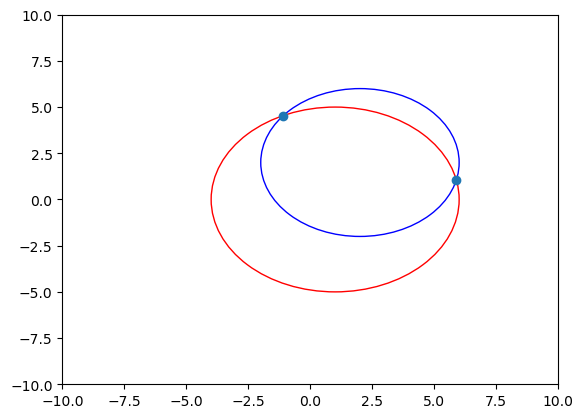

In [10]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((x1, y1), r1, color='r', fill=False)
circle2 = plt.Circle((x2, y2), r2, color='b', fill=False)

fig, ax = plt.subplots()
ax.add_patch(circle1)
ax.add_patch(circle2)

ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.scatter(xs, ys)

### Mátrixos feladat
Adj képletet $2\times 2$-as mátrixok sajátértékeinek a kiszámítására!

In [ ]:
a, b, c, d = sym.symbols("a b c d")
M = sym.Matrix([[a, b],
                [c, d]])
l = sym.symbols("λ")
L = sym.diag(l,l)
l1, l2  = sym.solve(sym.det(M - L), l)
l1.subs([(a, 2), (b, 1), (c, 0), (d, 1)]), l2.subs([(a, 2), (b, 1), (c, 0), (d, 1)])

In [ ]:
l1, l2

In [ ]:
M.eigenvals()

### Deriválós feladat

Van $P$ méter drótkerítésem, és szeretnék az alpakáimnak lekeríteni az udvaromból ennek segítségével minél nagyobb, téglalap alakú területet. Hogyan mérjem ki az oldalait?

In [32]:
def max_area_rectangle(P):
    # Your code here
    x = sym.symbols("x")
    X = sym.solve(sym.diff(-x**2+x*P/2), x)[0]
    Y = P/2 - X
    return float(X), float(Y)

In [34]:
max_area_rectangle(28)

(7.0, 7.0)

Le akarok választani $A$ területet az alpakafarmomnak, azonban nincs nagyon sok pénzem, így a lehető legkevesebb kerítést szeretném felhasználni. Hogyan mérjem ki ekkor az oldalakat?

In [35]:
def min_perimeter_rectangle(A):
    # Your code here
    x = sym.symbols("x")
    X = sym.Abs(sym.solve(sym.diff(2*x+2*A/x), x)[0])
    Y = A/X
    return float(X), float(Y)

In [36]:
min_perimeter_rectangle(49)

(7.0, 7.0)

### Integrálós feladat

Írj egy függvényt, ami kiszámolja, hogy egy standard normális eloszlású valószínűségi változó mekkora valószínűséggel kisebb, mint egy inputként kapott szám! _(Vagyis írd meg a standard normális eloszlás eloszlásfüggvényét)_

A standard normális eloszlás sűrűségfüggvénye:

$$
    X\sim \mathcal{N}(0,1)\implies f_X(x)=\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{x^2}{2}}
$$

In [ ]:
def standard_normal_distribution(t):
    x = sym.S("x")
    p = sym.integrate((1/sym.sqrt(2*sym.pi))*sym.exp(-(x**2)/2), (x, -sym.oo, t))
    return p.evalf()

### Lánctörtek
* Készíts egy függvényt, amely a fenti _szép_ lánctört alakban ábrázolja a számot az $\left[a_0,a_1,\dots,a_n\right]$ reprezentáció alapján.
* Készíts egy függvényt, amely kiszámolja egy $\frac{n}{d}$ alakú racionális szám lánctörtreprezentációját, ami $\left[a_0,a_1,\dots,a_n\right]$, ahol \[
    \frac{n}{d} = \frac{1}{\frac{1}{\frac{1}{\frac{1}{a_n}+\ddots}+a_2}+a_1}+a_0,
\]  és minden $i=0,\dots,n$-re $a_i\in\mathbb{Z}$. _Bónusz:_ Legyen képes a függvény tetszőleges valós számot is         közelíteni lánctörttel. Mi lenne $\sqrt{2}$ egy közelítése?



In [39]:
https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#example-continued-fractions

SyntaxError: invalid syntax (106474895.py, line 1)

In [24]:
r = 415 / 93
int_part, rem = divmod(r, 1)
repr = [int_part]
cc = 0
while rem > 0.00001:
    cc += 1
    int_part, rem = divmod(1 / rem, 1)
    repr.append(int_part)
    print(rem)
    if cc > 10:
        break
print(repr)

0.16279069767442067
0.14285714285706508
3.811173598933237e-12
[4.0, 2.0, 6.0, 7.0]


In [25]:
import sympy as sym

In [28]:
a,b = sym.symbols("a b")
int_part , rem = sym.divmod(a, b)
print(int_part, rem)

AttributeError: module 'sympy' has no attribute 'divmod'

In [12]:
r = 415/93
N = [r]
D = [1]
A = []

while D[-1] != 0:
    d = D[-1]
    n = N[-1]
    a = (n/d)//1
    A.append(a)
    N.append(d)
    D.append(n%d)

print(A)

[4.0, 2.0, 6.0, 7.0, 281545363051.0, 3.0, 1.0, 1.0, 2.0, 2.0]


In [15]:
import sympy as sym

def to_cont_frac(r, max_it = sym.oo):
    N = [r]
    D = [1]
    A = []

    it = 0
    while D[-1] != 0 and it < max_it:
        d = D[-1]
        n = N[-1]
        a = (n / d) // 1
        A.append(a)
        N.append(d)
        D.append(n % d)
        it += 1
    return A

In [38]:
def list_to_frac(l):
    expr = sym.Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr

In [29]:
def list_to_frac(l, evaluate = False):
    expr = sym.Integer(0)
    last = True
    for i in l[-1:0:-1]:
        expr = sym.Add(i, expr, evaluate=last or evaluate)
        expr = sym.Pow(expr, -1, evaluate=evaluate)
        last=False
    return sym.Add(l[0], expr, evaluate=evaluate)

In [30]:
# A = to_cont_frac(sym.Rational(3363, 2378))
A = to_cont_frac(sym.sqrt(2), max_it=20)
print(A)

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [31]:
list_to_frac(A, evaluate = False).evalf(50)

1.4142135623730964308320372569747414537112549445344

In [19]:
B = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
list_to_frac(B, evaluate = True).evalf(100)

1.618034055727554179566563467492260061919504643962848297213622291021671826625386996904024767801857585

In [ ]:
4181/2584

In [ ]:
((1+sym.sqrt(5))/2).evalf(100)